# Survey features checklist
This notebook provides a checklist for reviewing the logic and contents of an EDSL survey and ensuring that it will run as you intend it to.

**Support:** Please reach out to us with any questions or issues! 
Send an email to **info@expectedparrot.com** or post a message at [Discord](https://discord.com/invite/mxAYkjfy9m).

## How EDSL works
At its core, EDSL is built on the concept of a [`Question`](https://docs.expectedparrot.com/en/latest/questions.html) being answered by an AI [`Agent`](https://docs.expectedparrot.com/en/latest/agents.html), using a large language [`Model`](https://docs.expectedparrot.com/en/latest/language_models.html) to generate a response that is returned as a formatted [`Result`](https://docs.expectedparrot.com/en/latest/results.html). 
A typical workflow consists of the following steps:

1. Construct **questions** of different types (multiple choice, free text, etc.) and combine them in a survey. Learn about [question types](https://docs.expectedparrot.com/en/latest/questions.html).
2. *Optional:* Add **data or content** to your questions (from CSVs, PDFs, docs, images, etc.). Learn about [scenarios](https://docs.expectedparrot.com/en/latest/scenarios.html).
3. *Optional:* Add **rules or logic** to specify how questions should be presented (e.g., skip/stop rules, or including context of other questions). Learn about [survey rules](https://docs.expectedparrot.com/en/latest/surveys.html).
4. *Optional:* Design or import **personas** for AI agents to answer the questions. Learn about [agents](https://docs.expectedparrot.com/en/latest/agents.html).
5. Select **language models** to generate responses. EDSL works with hundreds of popular [models](https://docs.expectedparrot.com/en/latest/language_models.html).
6. Run the survey and get a formatted dataset of **results**. Use [built-in methods](https://docs.expectedparrot.com/en/latest/results.html) for analyzing them.
7. *Optional:* Store and share your work at the [Coop](https://www.expectedparrot.com/content/explore): a platform for AI research that is fully integrated with EDSL. [Learn more](https://docs.expectedparrot.com/en/latest/coop.html).

## Issues checklist
Below are some issues to consider before running a survey, with links to examples of EDSL features for handling them.

**Are you using appropriate question types?** <br>
Ensure that the question type you are using is appropriate for the question you are presenting.
* Use `QuestionYesNo` when you only want to allow "Yes" or "No" responses.
* Use `QuestionMultipleChoice` when you want to require that only one option be selected.
* Use `QuestionCheckBox` when you want to allow multiple (or no) selections or specify a number of selections.

**Are question options correct and complete?** <br>
Ensure that the question options make sense for the question text.
* Does the question text ask for options not presented, or a different number of options?
* Should the question options include an option for non-responses (e.g., "I do not know.")?

**Do any questions require context of other questions?** <br>
Survey questions are administered asynchronously by default, meaning that the presentation of one question does not include context of any other questions in the survey unless you specify otherwise. 
This default functionality reduces costs and runtime.
It also allows you to fine-tune and readily compare responses to versions of questions with different contexts. 

If a question depends on or requires information about other questions in a survey, you need to add a rule specifying the logic to be applied.
This can be done in a variety of ways:
* Use [piping](https://docs.expectedparrot.com/en/latest/surveys.html#id2) to add components of a question in another question (e.g., insert the answer to a question in the text of a follow-up question).
* Use question [memory](https://docs.expectedparrot.com/en/latest/surveys.html#question-memory) to include the entire context of a question/answer in the presentation of a different question (*"You were previously asked..."*). There are separate rules for adding the context of a single question, a set of questions, all prior questions, or a lagged number of questions.

**Testing a model's ability to answer a question** <br>
Running test questions and examining the answers and ["comment" fields](https://docs.expectedparrot.com/en/latest/questions.html#optional-additional-parameters) can help you understand whether a question needs to be improved.
You can also run questions *about* your questions for [cognitive testing](https://docs.expectedparrot.com/en/latest/notebooks/research_methods.html) (e.g., *"How is the following question confusing: {{ question }}"*)

## Tools for integrating data
EDSL provides many methods for importing and formatting data or content to be used with a survey.
This can be particularly useful for surveys that involve [data labeling](https://docs.expectedparrot.com/en/latest/notebooks/data_labeling_example.html) or [data cleaning](https://docs.expectedparrot.com/en/latest/notebooks/data_cleaning.html) tasks, such as using questions to extract information from unstructured texts or apply labels to images or other content.
This is done by creating [`Scenerio`](https://docs.expectedparrot.com/en/latest/scenarios.html) objects representing data or content to be added to survey questions (e.g., *"What is the main topic of this text? {{ text }}?", "What is in this image? {{ image }}"*).
See [examples](https://docs.expectedparrot.com/en/latest/notebooks/question_loop_scenarios.html) for working with [PDFs](https://docs.expectedparrot.com/en/latest/notebooks/scenario_from_pdf.html), CSVs, [images](https://docs.expectedparrot.com/en/latest/notebooks/image_scenario_example.html), docs, [tables](https://docs.expectedparrot.com/en/latest/notebooks/scenario_list_wikipedia.html) and other data types.
You can also use scenarios to store [metadata](https://docs.expectedparrot.com/en/latest/notebooks/adding_metadata.html) for surveys.

### Converting questions
Many models are highly capable of reformatting non-EDSL surveys based on a prompt that includes basic instructions or examples of EDSL code. 
This can be an efficient way to reconstruct an existing survey in EDSL and then modify as needed with above-mentioned methods.  
See examples: [CES data](https://docs.expectedparrot.com/en/latest/notebooks/ces_data_edsl.html); [GoogleForms](https://docs.expectedparrot.com/en/latest/notebooks/google_form_to_edsl.html).

## Examples
In the steps below we create a simple survey and then demonstrate methods for adding skip/stop rules, piping and question memory.

In [1]:
from edsl import QuestionYesNo, QuestionMultipleChoice, QuestionLinearScale, QuestionList, Survey

q_ever_voted = QuestionYesNo(
    question_name = "ever_voted",
    question_text = "Have you ever voted in an election?"
)

# We can add a rule to stop the survey OR skip questions based on the prior answer 
# Need to ensure question options are appropriate if dependent on a prior answer 

q_how_many = QuestionMultipleChoice(
    question_name = "how_many",
    question_text = "How many times have you voted before?",
    question_options = ["Once", "More than once", "I do not know"] # Consider adding "Never"
)

# We can add a memory of prior questions/answers when other questions are presented

q_important = QuestionLinearScale(
    question_name = "important",
    question_text = "On a scale from 1 to 5, how important to you is voting?",
    question_options = [1, 2, 3, 4, 5],
    option_labels = {1:"Not at all important", 5:"Very important"}
)

q_offices = QuestionList(
    question_name = "offices",
    question_text = "List all the political offices you have voted for."
)

# We can pipe the answer to a prior question into the next question text or options 

q_impact = QuestionMultipleChoice(
    question_name = "impact",
    question_text = "Which political office has the biggest impact on your daily life?",
    question_options = "{{ offices.answer }}"
)

questions = [
    q_ever_voted,
    q_how_many,
    q_important,
    q_offices,
    q_impact
]

survey = Survey(questions)

To inspect the user prompts, which contain the question instructions:

In [2]:
job = survey.to_jobs()

job.prompts().select("user_prompt", "question_name").print(format="rich")

# survey.show_prompts() # to show both user and sytem prompts (but we have not added an agent for the system prompt)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ user_prompt                                                                                     ┃ question_name ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│                                                                                                 │ ever_voted    │
│ Have you ever voted in an election?                                                             │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ No                                                                                              │               │
│                                                                                                 │               │
│ Yes                                                                                             │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Only 1 option may be selected.                                                                  │               │
│ Please respond with just your answer.                                                           │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ After the answer, you can put a comment explaining your response.                               │               │
├─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┤
│                                                                                                 │ how_many      │
│ How many times have you voted before?                                                           │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Once                                                                                            │               │
│                                                                                                 │               │
│ More than once                                                                                  │               │
│                                                                                                 │               │
│ I do not know                                                                                   │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Only 1 option may be selected.                                                                  │               │
│                                                                                                 │               │
│ Respond only with a string corresponding to one of the options.                                 │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ After the answer, you can put a comment explaining why

### Stop rule

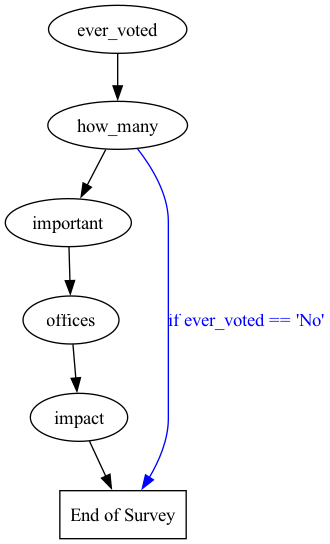

In [3]:
stop_survey = Survey(questions).add_stop_rule("how_many", "ever_voted == 'No'")

stop_survey.show_flow()

### Skip rule

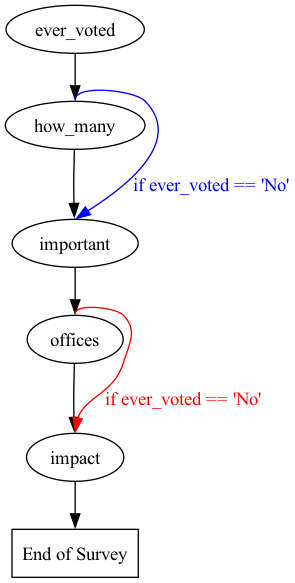

In [4]:
skip_survey = (
    Survey(questions)
    .add_skip_rule("how_many", "ever_voted == 'No'")
    .add_skip_rule("offices", "ever_voted == 'No'")
)

skip_survey.show_flow()

### Targeted question memory

In [5]:
targeted_memory_survey = (
    Survey(questions)
    .add_targeted_memory("how_many", "ever_voted")
    .add_targeted_memory("important", "ever_voted")
)

In [6]:
targeted_memory_survey.show_prompts()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ user_prompt                                                                                     ┃ system_prompt ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│                                                                                                 │               │
│ Have you ever voted in an election?                                                             │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ No                                                                                              │               │
│                                                                                                 │               │
│ Yes                                                                                             │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Only 1 option may be selected.                                                                  │               │
│ Please respond with just your answer.                                                           │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ After the answer, you can put a comment explaining your response.                               │               │
├─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┤
│                                                                                                 │               │
│ How many times have you voted before?                                                           │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Once                                                                                            │               │
│                                                                                                 │               │
│ More than once                                                                                  │               │
│                                                                                                 │               │
│ I do not know                                                                                   │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Only 1 option may be selected.                                                                  │               │
│                                                                                                 │               │
│ Respond only with a string corresponding to one of the options.                                 │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ After the answer, you can put a comment explaining why

### Full question memory

In [7]:
full_memory_survey = (
    Survey(questions)
    .set_full_memory_mode()
)

In [8]:
full_memory_survey.show_prompts()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ user_prompt                                                                                     ┃ system_prompt ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│                                                                                                 │               │
│ Have you ever voted in an election?                                                             │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ No                                                                                              │               │
│                                                                                                 │               │
│ Yes                                                                                             │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Only 1 option may be selected.                                                                  │               │
│ Please respond with just your answer.                                                           │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ After the answer, you can put a comment explaining your response.                               │               │
├─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┤
│                                                                                                 │               │
│ How many times have you voted before?                                                           │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Once                                                                                            │               │
│                                                                                                 │               │
│ More than once                                                                                  │               │
│                                                                                                 │               │
│ I do not know                                                                                   │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Only 1 option may be selected.                                                                  │               │
│                                                                                                 │               │
│ Respond only with a string corresponding to one of the options.                                 │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ After the answer, you can put a comment explaining why

### Combining rules
Simply chain rules to combine them:

In [9]:
multi_rule_survey = (
    Survey(questions)
    .add_skip_rule("how_many", "ever_voted == 'No'")
    .add_targeted_memory("how_many", "ever_voted")
)

In [10]:
multi_rule_survey.show_prompts()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ user_prompt                                                                                     ┃ system_prompt ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│                                                                                                 │               │
│ Have you ever voted in an election?                                                             │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ No                                                                                              │               │
│                                                                                                 │               │
│ Yes                                                                                             │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Only 1 option may be selected.                                                                  │               │
│ Please respond with just your answer.                                                           │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ After the answer, you can put a comment explaining your response.                               │               │
├─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┤
│                                                                                                 │               │
│ How many times have you voted before?                                                           │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Once                                                                                            │               │
│                                                                                                 │               │
│ More than once                                                                                  │               │
│                                                                                                 │               │
│ I do not know                                                                                   │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ Only 1 option may be selected.                                                                  │               │
│                                                                                                 │               │
│ Respond only with a string corresponding to one of the options.                                 │               │
│                                                                                                 │               │
│                                                                                                 │               │
│ After the answer, you can put a comment explaining why